[Source article](https://lekhuyen.medium.com/lenet-and-mnist-handwritten-digit-classification-354f5646c590)

## Considerations:

LeNet (or LeNet-5) is a convolutional neural network structure proposed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in 1989. The first purpose of this network is to recognize handwritten digits in images. It was successfully applied for identifying handwritten zip code numbers provided by the US Postal Service

### Architecture:

LeNet consists of 2 parts:

The first part includes two convolutional layers and two pooling layers which are placed alternatively.
The second part consists of three fully connected layers.
The architecture of LeNet is described by the following figure:
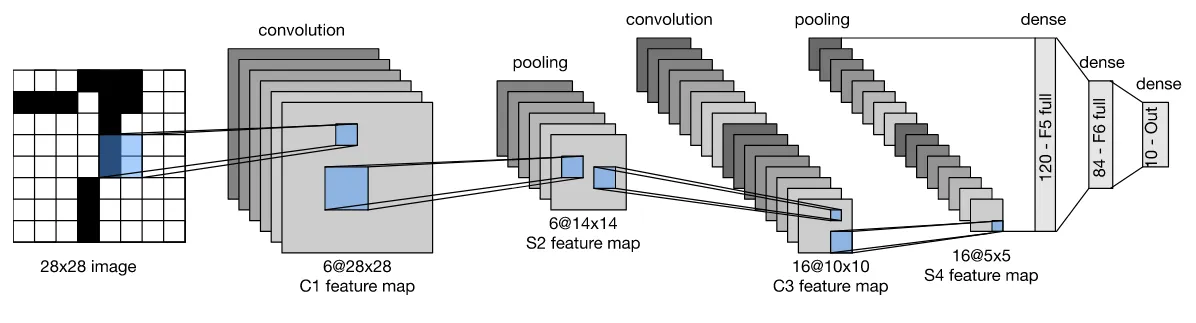

In the figure above, Cx, Sx, Fx are corresponding to the convolutional layer, sub-sampling layer (a.k.a pooling layer), and fully connected layer, respectively, where x denotes the layer index.

* The input is images of size 28 × 28
* C1 is the first convolutional layer with 6 convolution kernels of size 5× 5.
* S2 is the pooling layer that outputs 6 channels of 14 × 14 images. The pooling window size, in this case, is a square matrix of size 2 × 2.
* C3 is a convolutional layer with 16 convolution kernels of size 5 × 5. Hence, the output of this layer is 16 feature images of size 10 × 10.
* S4 is a pooling layer with a pooling window of size 2 × 2. Hence, the dimension of images through this layer is halved, it outputs 16 feature images of size 5 × 5.
* C5 is the convolutional layer with 120 convolution kernels of size 5 × 5. Since the inputs of this layer have the same size as the kernel, then the output size of this layer is 1 × 1. The number of channels in output equals the channel number of kernels, which is 120. Hence the output of this layer is 120 feature images of size 1 × 1.
* F6 is a fully connected layer with 84 neurons which are all connected to the output of C5.
* The output layer consists of 10 neurons corresponding to the number of classes (numbers from 0 to 9).


## The MNIST Dataset:

Loading MNIST data set:

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

Visualizing randomly some images in the training set:

In [ ]:
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

## Preprocessing Data:

This task includes the following steps:

* Reshape images into the required size of Keras
* Convert integer values into float values
* Normalize data
* One-hot encoding labels
    * technique that used to represent categorical variables as numerical in a machine learning model

In [ ]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

# (X_train, y_train, X_test, y_test) = preprocess_data(X_train, y_train, X_test, y_test)

## Building the model

Building LeNet5:

* Activation for Convolutional Layers: ReLU - f(x) = max(0, x)
* Activation for first Dense layer: ReLU - f(x) = max(0, x)
* Activation for second Dense Layer/output layer: softmax

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
# metrics 
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD

def LeNet():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The first fully connected layer 
  model.add(Dense(120, activation = 'relu'))
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))
  
  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy, 
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 
  # to optimize the loss function
  # metric: accuracy 
  
  opt = SGD(learning_rate = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model

model = LeNet()

## Training the model:

Training LeNet:

In [ ]:

def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, 
                      verbose = 1)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

train_model(model, X_train, y_train, X_test, y_test, 50, 128)

Save the trained model to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
save_path = f'/content/drive/MyDrive/Colab Notebooks/Colab Folder/model.keras'
model.save(filepath=save_path)

Load the trained model from google drive

In [ ]:
import keras.models as models
from google.colab import drive
drive.mount('/content/drive')
save_path = f'/content/drive/MyDrive/Colab Notebooks/Colab Folder/model.keras'
model = models.load_model(save_path)

## Testing the model:

Testing the model and saving the output.

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow # Import for displaying images in Colab

# predict labels for the test set
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  cv2_imshow(img)
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = model.predict(img)
  # determine the label corresponding to vector vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)
  print(f'Predicted Label: {y_p}, Actual Value: {y_test[i]}')
  
# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)
save_path = f'/content/drive/MyDrive/Colab Notebooks/Colab Folder/predictions.csv'
np.savetxt(save_path, y_test_pred, delimiter=',')

Testing the model without saving the output

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow # Import for displaying images in Colab


# predict labels for the test set
for i in np.random.choice(np.arange(0, len(X_test)), size=(10,)):
  img = X_test[i]
  cv2_imshow(img)
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = model.predict(img)
  # determine the label corresponding to vector vec_p
  y_p = np.argmax(vec_p)
  print(f'Predicted Label: {y_p}, Actual Value: {y_test[i]}')

## Create the Confusion Matrix:

Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
from numpy import loadtxt
import matplotlib.pyplot as plt 
import seaborn as sns 

# load predictions
save_path = f'/content/drive/MyDrive/Colab Notebooks/Colab Folder/predictions.csv'
y_test_pred = loadtxt(save_path, delimiter=',')

con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

## Visualising the model's predictions:

Visualise some numbers:

In [ ]:
import numpy as np
import random
# all categories
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize = (12,7))
for i in np.arange(8):
  ind = random.randint(0,len(X_test))
  img = X_test[ind]
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  predict_x=model.predict(img) 
  v_p=np.argmax(predict_x,axis=1)
  plt.subplot(240+1+i)
  plt.imshow(X_test[ind])
  plt.title(cates[v_p[0]])

## What does the model look like?

Finally, draw the model so we can talk about it:

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the plot in Colab
Image(retina=True, filename='model.png')